In [212]:
%reset
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [284]:
class EDA:
    def __init__(self, df):
        self.df = df
        self.corr = np.array([])
        self.fig_settings()
        
    def fig_settings(self):
        matplotlib.rcParams.update({'font.size': 18})
        
    def boxplots(self, columns):
        fig, axes = plt.subplots(len(columns), 1, figsize=(10, 20))
        fig.tight_layout()
        for index, col in enumerate(columns):
            sns.boxplot(x=df[col], ax=axes[index])
            
    def get_corr(self, feature_columns, target_col):
        for col in feature_columns:
            self.corr = np.append(self.corr, self.df[col].corr(self.df[target_col]))
        self.corr = np.sort(self.corr)[::-1]
        return self.corr
        
    def corr_heatmap(self, feature_columns, target_col):
        correlations = np.array([self.get_corr(feature_columns, target_col)]).T
        print(correlations.shape)
        sns.heatmap(correlations, annot=True)
            
            
    def clean_zero_values(self, columns):
        for col in columns:
            self.df = df.drop(df.loc[(df[col] == 0)].index)
    

In [285]:
df = pd.read_csv("train_c.csv")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   p_id                      614 non-null    int64  
 1   Pregnancies               614 non-null    int64  
 2   Glucose                   614 non-null    int64  
 3   BloodPressure             614 non-null    int64  
 4   SkinThickness             614 non-null    int64  
 5   Insulin                   614 non-null    int64  
 6   BMI                       614 non-null    float64
 7   DiabetesPedigreeFunction  614 non-null    float64
 8   Age                       614 non-null    int64  
 9   Outcome                   614 non-null    int64  
dtypes: float64(2), int64(8)
memory usage: 48.1 KB


None

(8, 1)


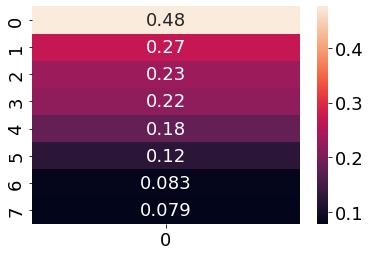

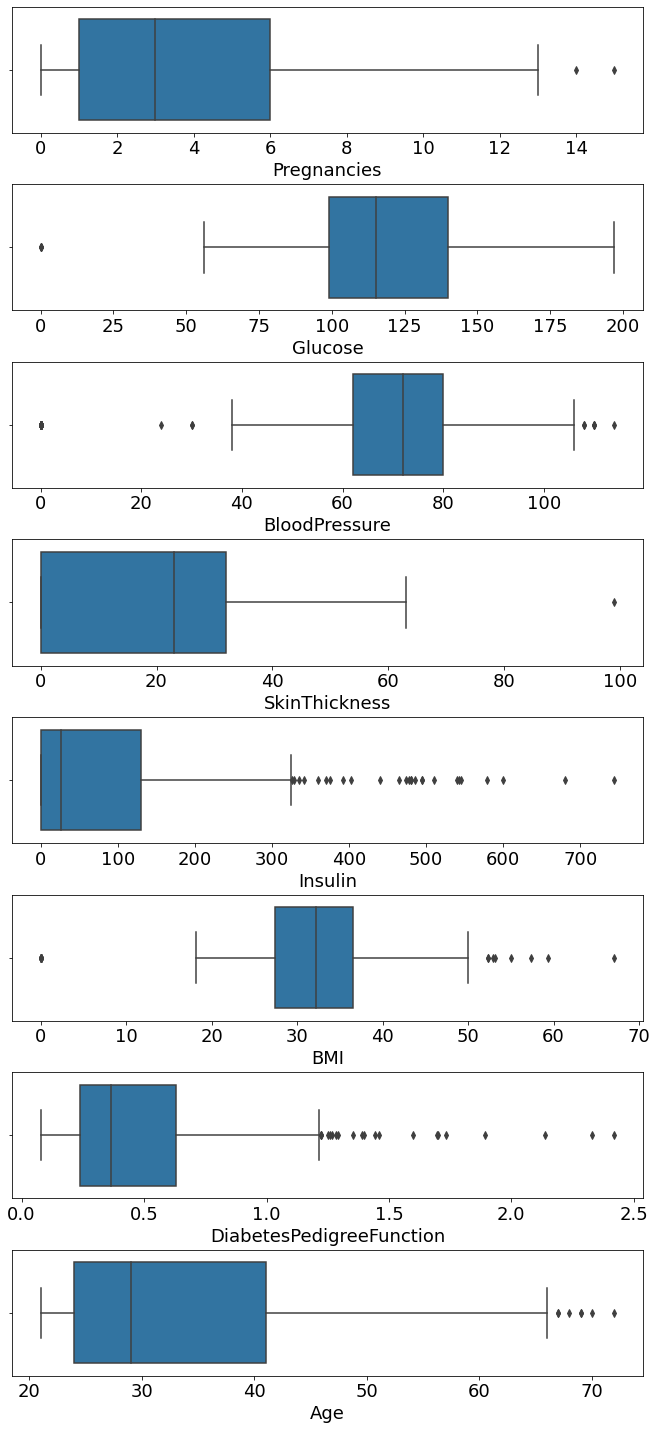

In [286]:
eda = EDA(df)
display(eda.df.info())
eda.corr_heatmap(df.columns[1:-1], df.columns[-1])
eda.boxplots(eda.df.columns[1:-1])

## Voldoet de data aan de voorwaarden voor machine learning
De data voldoet aan de voorwaarden aangezien de data:<br>
&nbsp;&nbsp;&nbsp;&nbsp;- In een dataframe staat<br>
&nbsp;&nbsp;&nbsp;&nbsp;- Geen lege waardes bevat<br>
&nbsp;&nbsp;&nbsp;&nbsp;- In numerieke waardes is beschreven<br>

Echter is nog niet bekend of de data van goede kwaliteit is dus hoewel het technisch gezien gebruikt kan worden moet er nog wel gekeken worden naar hoe de data eruit ziet.